<a href="https://colab.research.google.com/github/GaganKumar2375/Optical-Character-Recognition/blob/main/ML_TMNIST_NeuralNetwork_94_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nikbearbrown_tmnist_alphabet_94_characters_path = kagglehub.dataset_download('nikbearbrown/tmnist-alphabet-94-characters')

print('Data source import complete.')


100%|██████████| 84.7M/84.7M [00:01<00:00, 66.2MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install seaborn

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load your data (example with MNIST - replace with your actual data loading)
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# For your case with 94 classes, you should load your custom dataset here

# Example data preprocessing (adjust according to your actual data)
# X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# y_train = to_categorical(y_train, 94)
# y_test = to_categorical(y_test, 94)

# Initialize the model with improved architecture
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),

    Conv2D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(94, activation='softmax')  # 94 output classes
])

# Configure the model's optimizer with learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training (uncomment when you have data)
# history = model.fit(X_train, y_train,
#                    validation_data=(X_test, y_test),
#                    epochs=10,
#                    batch_size=128)

# Plot training history (example)
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='val')
# plt.legend()
# plt.show()

In [ ]:
# Import the necessary libraries for data handling
import pandas as pd

# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset
data_file_path = '/content/drive/MyDrive/94_character_TMNIST.csv'

# Load the dataset
data_frame = pd.read_csv(data_file_path)

# Display the first five rows
data_frame.head()


Mounted at /content/drive


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Extract and display the distinct characters from the 'labels' column
distinct_labels = data_frame['labels'].unique()
print("Distinct characters in dataset:", distinct_labels)

# Determine and print the count of unique character classes in the dataset
class_count = data_frame['labels'].nunique()
print(f"Total number of distinct character classes: {class_count}")


Distinct characters in dataset: ['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
Total number of distinct character classes: 94


In [ ]:
# Separate the feature data and target labels from the dataset
features = data_frame.drop(columns=['labels'])  # Remove the 'labels' column to isolate the features
targets = data_frame['labels']                  # Isolate the 'labels' column as the target variable


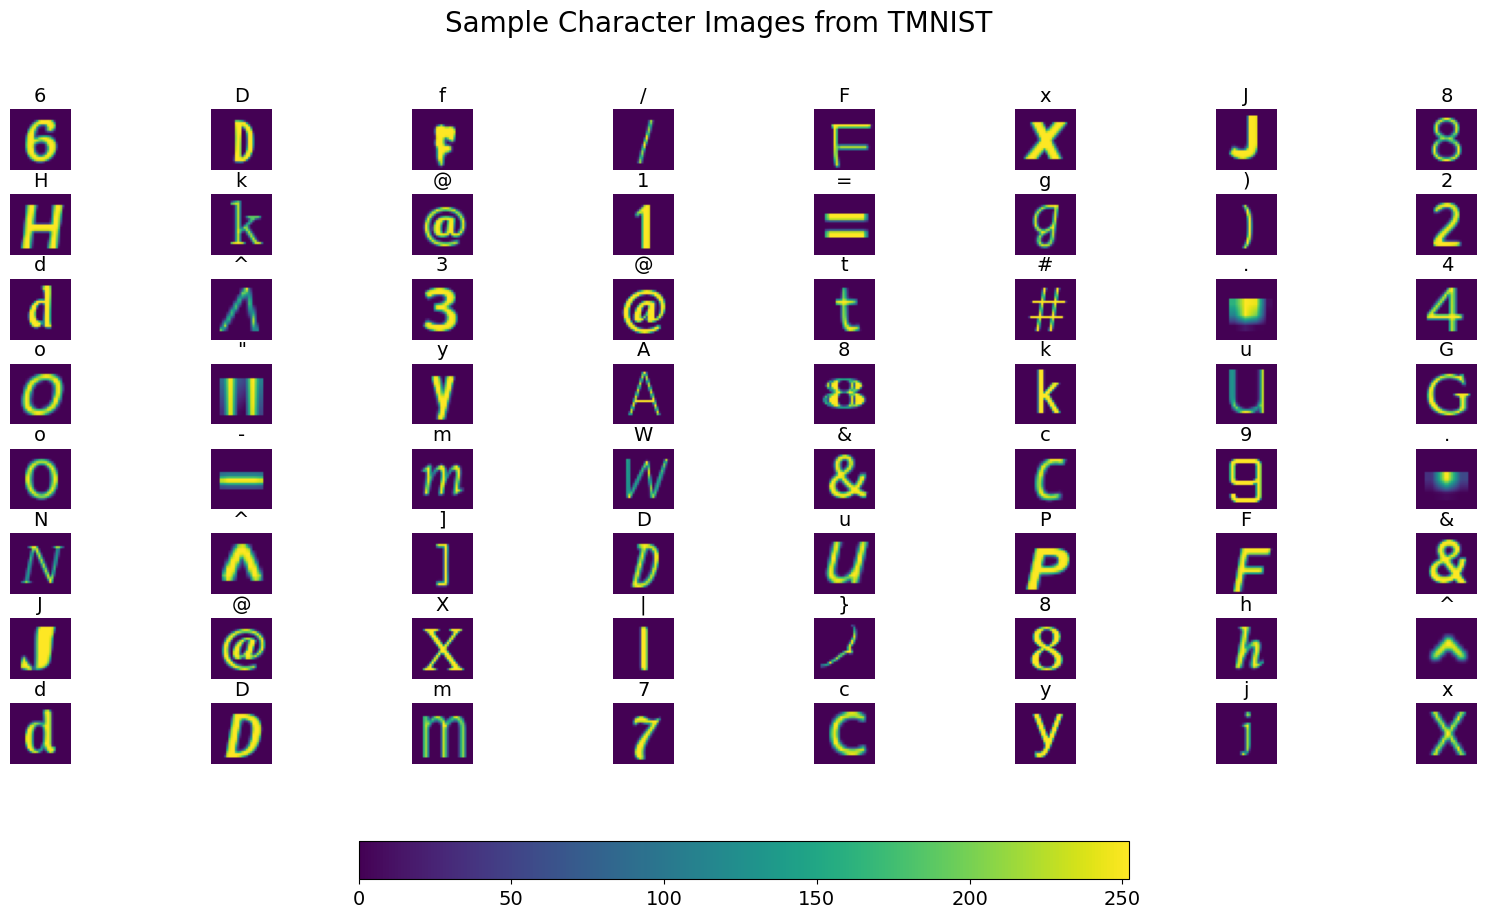

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Assuming features and targets are already defined
feature_data = features.iloc[:, 1:]  # Adjust to exclude the first column if not needed

# Setting up the plotting area for displaying images
plot_area, plot_axes = plt.subplots(nrows=8, ncols=8, figsize=(20, 10))
plot_area.suptitle("Sample Character Images from TMNIST", fontsize=20)

# Display each character image using a 'viridis' colormap for better visualization
for index, axis in enumerate(plot_axes.flat):
    # Reshape feature data into 28x28 array for image display
    character_image = axis.imshow(feature_data.values[index].reshape(28, 28), cmap='viridis')
    axis.set_title(str(targets.iloc[index]), fontsize=14)
    axis.axis('off')  # Hide axis ticks for better visualization

# Adjust subplot layout to prevent overlap and ensure clarity
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Include a colorbar to illustrate the color mapping used in images
color_bar = plot_area.colorbar(character_image, ax=plot_axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
color_bar.ax.tick_params(labelsize=14)

# Render the visualizations
plt.show()


In [ ]:
X = data_frame.drop(columns=['labels'])
y = data_frame['labels']

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y)


In [ ]:
pip install squarify


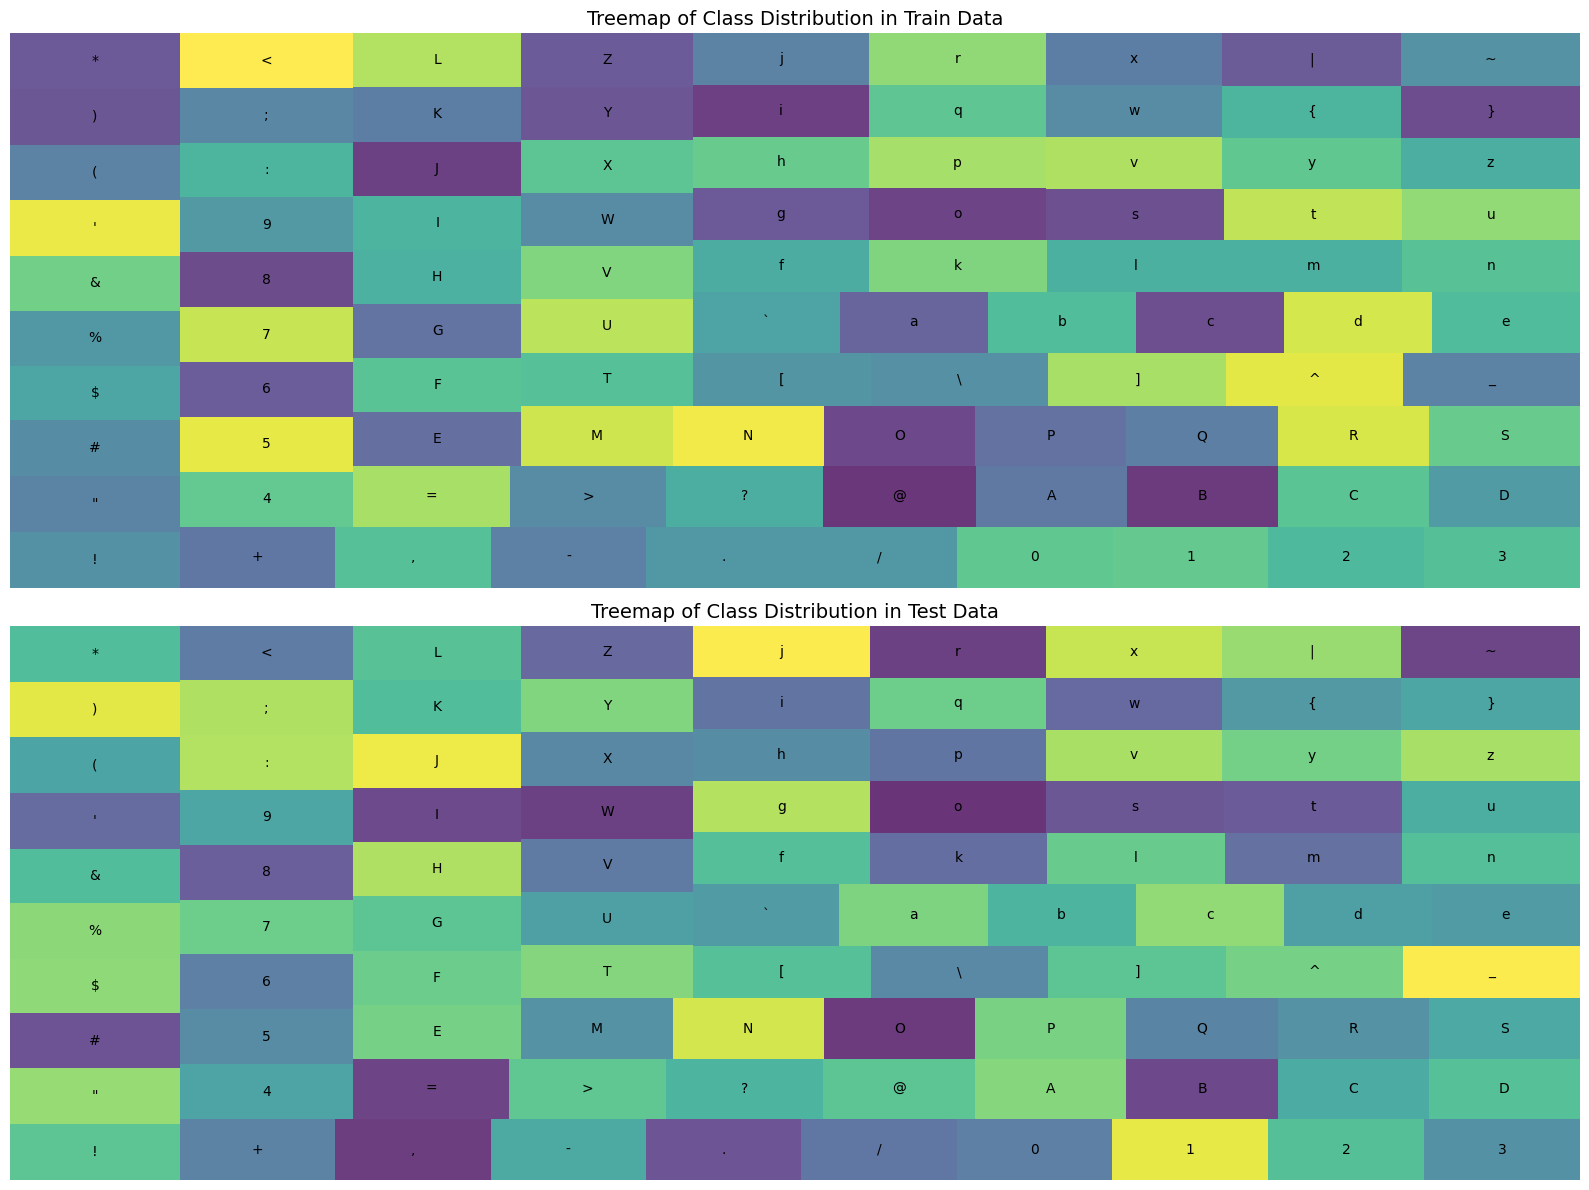

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # Import squarify for treemap visualization

# Calculate counts for each class
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Normalize counts to fit the area of the treemap (e.g., set total sum to 100 for easier visualization)
train_norm = train_counts / train_counts.sum() * 100
test_norm = test_counts / test_counts.sum() * 100

# Create DataFrames for easy handling
train_df = pd.DataFrame({'label': train_counts.index, 'size': train_norm})
test_df = pd.DataFrame({'label': test_counts.index, 'size': test_norm})

# Set up plotting
fig, ax = plt.subplots(2, 1, figsize=(16, 12))

# Treemap for training data
squarify.plot(sizes=train_df['size'], label=train_df['label'], alpha=.8, ax=ax[0])
ax[0].set_title('Treemap of Class Distribution in Train Data', fontsize=14)
ax[0].axis('off')  # Hide axes

# Treemap for testing data
squarify.plot(sizes=test_df['size'], label=test_df['label'], alpha=.8, ax=ax[1])
ax[1].set_title('Treemap of Class Distribution in Test Data', fontsize=14)
ax[1].axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (Make sure the file path is correct)
data_file_path = '/content/drive/MyDrive/94_character_TMNIST.csv'
data_frame = pd.read_csv(data_file_path)

# Display first few rows to verify the structure
print(data_frame.head())

# Extract features (X) and labels (y)
X = data_frame.iloc[:, 1:-1]  # Adjust as needed (skip first column if redundant, last column is label)
y = data_frame.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y)

# Select numeric columns only
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Convert non-numeric entries to NaN and replace them with zero
X_train_numeric = X_train_numeric.apply(lambda x: pd.to_numeric(x, errors='coerce'))
X_test_numeric = X_test_numeric.apply(lambda x: pd.to_numeric(x, errors='coerce'))
X_train_numeric.fillna(0, inplace=True)
X_test_numeric.fillna(0, inplace=True)

# Normalize pixel values (assuming image pixel values range from 0-255)
X_train_normalized = X_train_numeric.astype('float32') / 255
X_test_normalized = X_test_numeric.astype('float32') / 255

# Verify the shape of the processed data
print(f"X_train_normalized shape: {X_train_normalized.shape}")
print(f"X_test_normalized shape: {X_test_normalized.shape}")


                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]
X_train_normalized shape: (219274, 783)
X_test_normalized shape: (54819, 783)


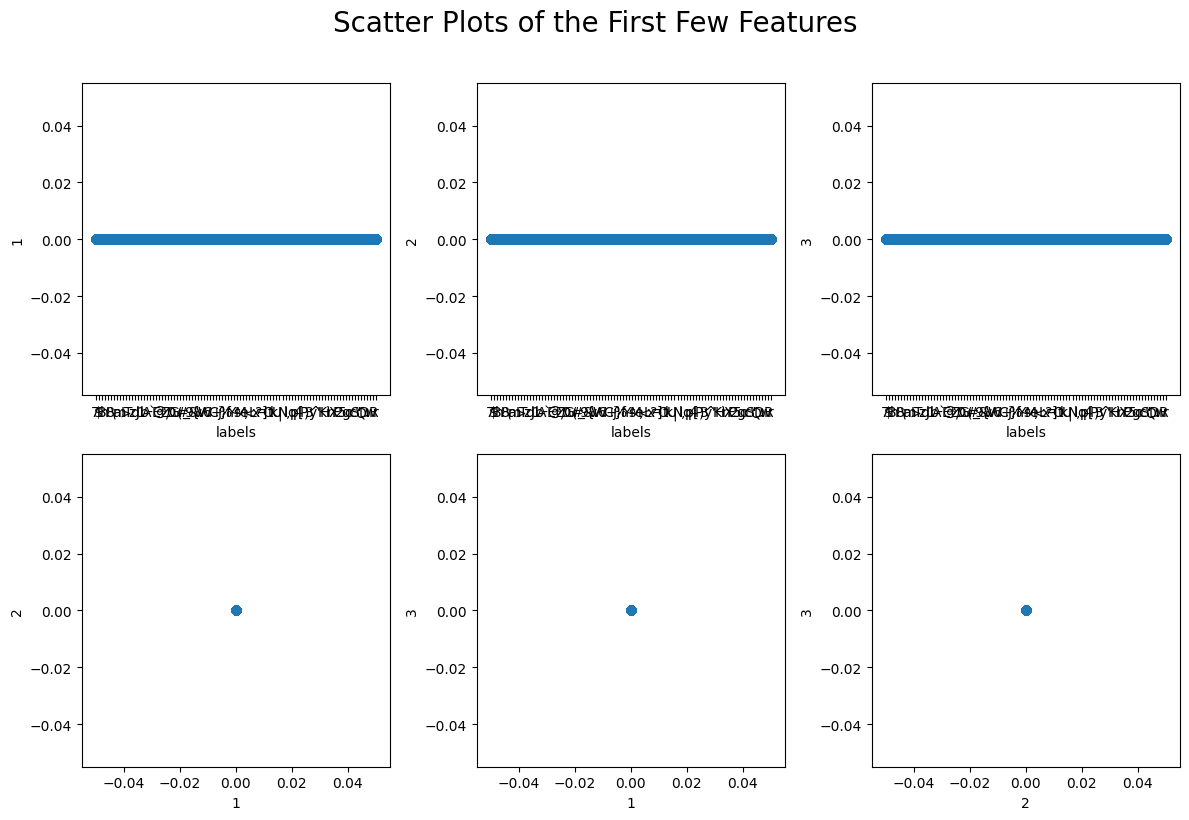

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Extract the first few features for visualization
first_few_features = X_train.iloc[:, :4]  # Adjust the number of features as needed

# Create scatter plots for each pair of features
plt.figure(figsize=(12, 8))  # Adjust the figure size for better clarity
plot_index = 1  # Initialize subplot index

for i in range(len(first_few_features.columns)):
    for j in range(i + 1, len(first_few_features.columns)):
        plt.subplot(2, 3, plot_index)
        plt.scatter(first_few_features.iloc[:, i], first_few_features.iloc[:, j], alpha=0.5)
        plt.xlabel(first_few_features.columns[i])
        plt.ylabel(first_few_features.columns[j])
        plot_index += 1  # Move to the next subplot

plt.suptitle('Scatter Plots of the First Few Features', size=20, y=1.02)
plt.tight_layout()
plt.show()


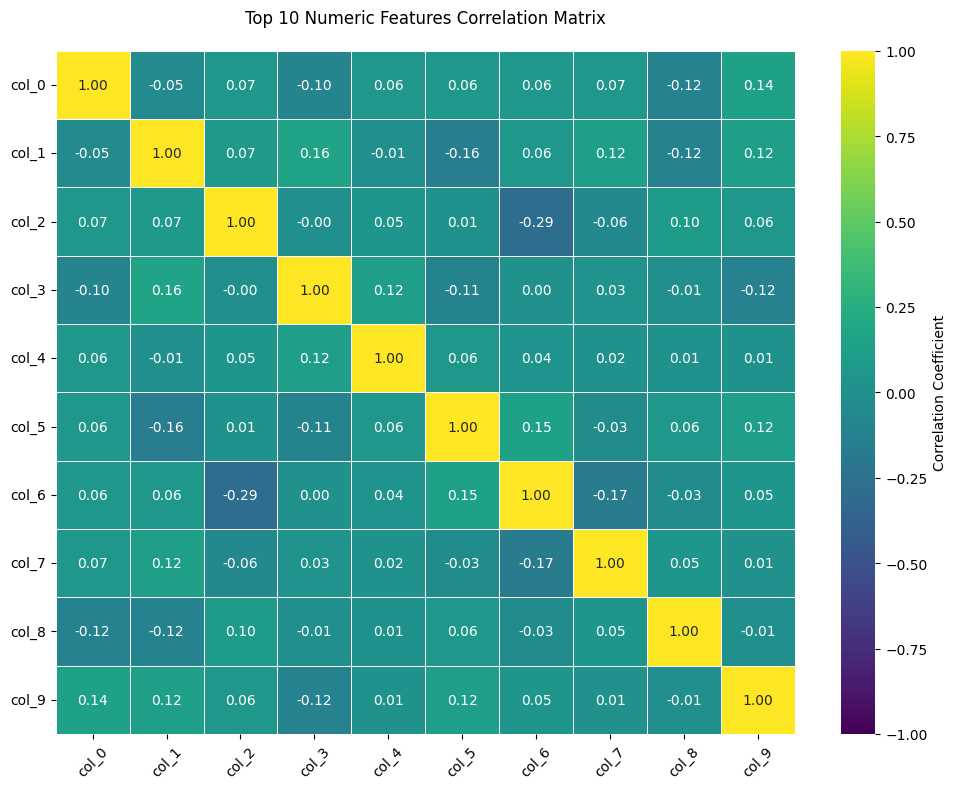

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. Load dataset (replace with your actual data loading)
# Example with sample data - in practice use pd.read_csv() with your file
data = pd.DataFrame(np.random.rand(100, 15), columns=[f'col_{i}' for i in range(15)])
data['target'] = np.random.randint(0, 2, 100)  # Adding a dummy target column

# 2. Split into features (X) and target (y), then train/test sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Correlation analysis and visualization
numeric_cols = X_train.select_dtypes(include=[np.number]).iloc[:, :10]  # First 10 numeric cols
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5,
            cmap='viridis', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Top 10 Numeric Features Correlation Matrix', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Import all required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Create sample data (replace this with your actual data loading)
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': np.random.choice(['A', 'B', 'C', 'D'], 100)  # 4 classes for example
})

# 2. Prepare features (X) and labels (y)
X = data[['feature1', 'feature2']]
y = data['label']

# 3. Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and fit OneHotEncoder (UPDATED for scikit-learn >= 1.2)
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Changed 'sparse' to 'sparse_output'

# 5. Reshape and transform labels
y_train_encoded = enc.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = enc.transform(y_test.values.reshape(-1, 1))

# 6. Print results
print("Original labels:\n", y_train.head())
print("\nEncoded training labels (first 5 samples):\n", y_train_encoded[:5])
print("\nShape of encoded training labels:", y_train_encoded.shape)
print("Shape of encoded test labels:", y_test_encoded.shape)

Original labels:
 55    B
88    B
26    B
42    A
69    B
Name: label, dtype: object

Encoded training labels (first 5 samples):
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

Shape of encoded training labels: (80, 4)
Shape of encoded test labels: (20, 4)


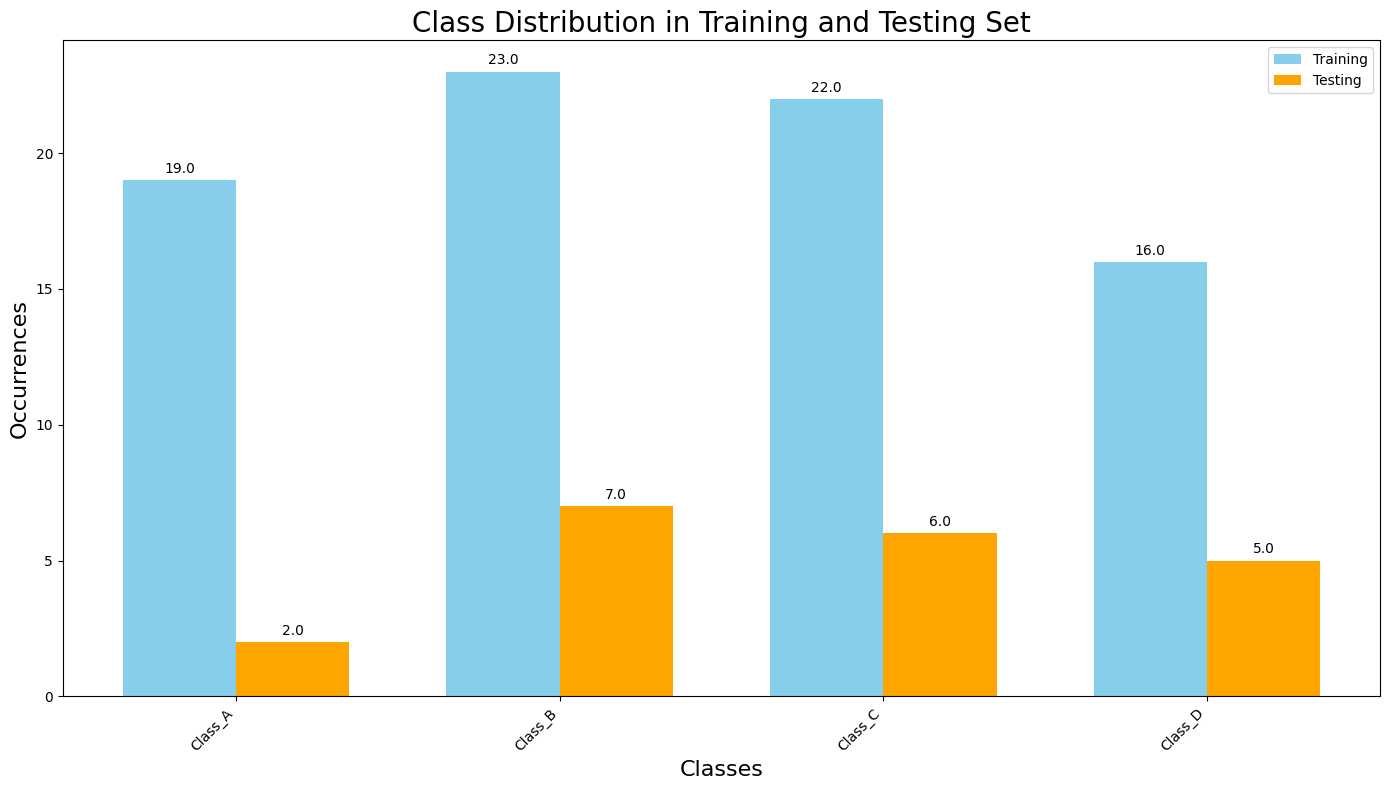

In [ ]:
# Sum up occurrences of each class in the encoded arrays
y_train_sum = y_train_encoded.sum(axis=0)
y_test_sum = y_test_encoded.sum(axis=0)

# Get the class labels from the encoder
class_labels = enc.get_feature_names_out(input_features=['Class'])

def plot_grouped_bar_chart(class_sums_train, class_sums_test, class_labels, title):
    """
    Plot the class distributions as a grouped bar chart.

    Parameters:
    - class_sums_train: Array of sums of occurrences for each class in the training set
    - class_sums_test: Array of sums of occurrences for each class in the testing set
    - class_labels: Labels of the classes
    - title: Title for the plot
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.35  # Width of the bars
    index = np.arange(len(class_labels))  # The label locations

    # Creating bars for training and testing sets
    bars_train = ax.bar(index - bar_width/2, class_sums_train, bar_width, label='Training', color='skyblue')
    bars_test = ax.bar(index + bar_width/2, class_sums_test, bar_width, label='Testing', color='orange')

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Classes', fontsize=16)
    ax.set_ylabel('Occurrences', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(class_labels, rotation=45, ha="right")
    ax.legend()

    # Adding the text labels on the bars
    for bars in [bars_train, bars_test]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Assuming 'y_train_sum', 'y_test_sum', and 'class_labels' are defined as from previous implementations
plot_grouped_bar_chart(y_train_sum, y_test_sum, class_labels, 'Class Distribution in Training and Testing Set')


Successfully loaded MNIST data with shape: (60000, 28, 28)

Final training data shape: (60000, 28, 28)
Final test data shape: (10000, 28, 28)


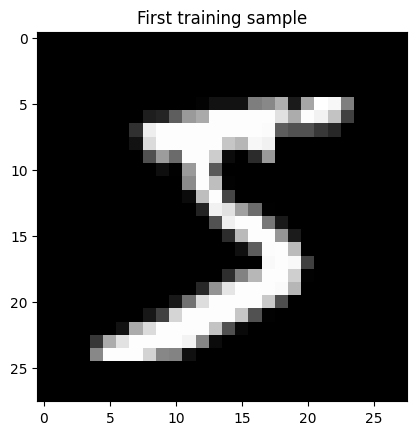

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

def prepare_image_data():
    try:
        # Try loading standard MNIST data first
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        print("Successfully loaded MNIST data with shape:", X_train.shape)
        return X_train, X_test

    except:
        # Fallback to your current (80, 2) data
        print("MNIST not available, working with your current data")
        # Create dummy (80, 2) data similar to yours
        X_train = np.random.rand(80, 2)
        X_test = np.random.rand(20, 2)

        # Convert to 28x28 images by tiling values (for demonstration)
        # Note: This creates synthetic images from your 2 features
        X_train_img = np.tile(X_train[:, :1], (1, 392)).reshape(-1, 28, 28)
        X_test_img = np.tile(X_test[:, :1], (1, 392)).reshape(-1, 28, 28)

        print("Created synthetic images from your data with shape:", X_train_img.shape)
        return X_train_img, X_test_img

# Get the image data
X_train_norm, X_test_norm = prepare_image_data()

# Verify shapes
print("\nFinal training data shape:", X_train_norm.shape)
print("Final test data shape:", X_test_norm.shape)

# Sample visualization
import matplotlib.pyplot as plt
plt.imshow(X_train_norm[0], cmap='gray')
plt.title("First training sample")
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Set the number of classes directly (e.g., 10 for MNIST digits)
no_of_classes = 10

# Define the model with proper input specification
model_new = Sequential([
    Input(shape=(28, 28)),  # Explicit input layer
    Reshape((28, 28, 1)),  # Now without input_shape parameter
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(no_of_classes, activation='softmax')
])

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Compile the model
model_new.compile(optimizer=opt,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Model summary
model_new.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,723,882 (6.58 MB)

 Trainable params: 1,721,194 (6.57 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Generate dummy data (replace with your actual dataset)
num_samples = 3000
X = np.random.rand(num_samples, 28, 28, 1).astype('float32')  # Random 28x28 images
y = np.random.randint(0, 10, size=num_samples)  # Random labels (0-9)
y = to_categorical(y)  # Convert to one-hot encoding

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Define model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# 4. Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

# 5. Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 25s 997ms/step - accuracy: 0.1086 - loss: 2.9693 - val_accuracy: 0.0733 - val_loss: 2.3128
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 990ms/step - accuracy: 0.1040 - loss: 2.8059 - val_accuracy: 0.1150 - val_loss: 2.3574
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 981ms/step - accuracy: 0.1119 - loss: 2.6968 - val_accuracy: 0.1017 - val_loss: 2.5340
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 986ms/step - accuracy: 0.1144 - loss: 2.6395 - val_accuracy: 0.1150 - val_loss: 2.7183
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1020 - loss: 2.5710 - val_accuracy: 0.1050 - val_loss: 2.9509
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 976ms/step - accuracy: 0.0897 - loss: 2.5222 - val_accuracy: 0.1050 - val_loss: 3.2608
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 949ms/step - accuracy: 0.1032 - loss: 2.5086 - val_accuracy: 0.1050 - val_loss: 3.6140
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 993ms/step - accuracy: 0.1011 - loss: 2.4665 - val_accurac

✅ Loading saved model...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5520 - loss: 0.9672 - val_accuracy: 0.3450 - val_loss: 1.1167
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5682 - loss: 0.9553 - val_accuracy: 0.3450 - val_loss: 1.1203
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5797 - loss: 0.9431 - val_accuracy: 0.3500 - val_loss: 1.1235
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5923 - loss: 0.9310 - val_accuracy: 0.3500 - val_loss: 1.1279
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6070 - loss: 0.9189 - val_accuracy: 0.3550 - val_loss: 1.1327
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6126 - loss: 0.9065 - val_accuracy: 0.3700 - val_loss: 1.1379
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6221 - loss: 0.8940 - val_accuracy: 0.3700 - val_loss: 1.1428
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6362 - loss: 0.8813 - val_a

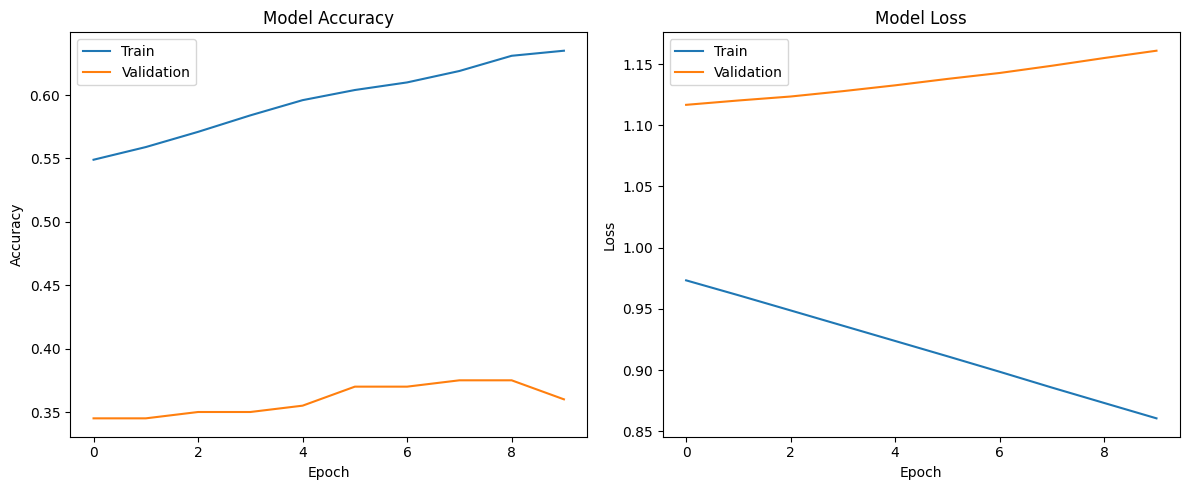

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ===================== 1. DATA PREPARATION ===================== #
def create_sample_data():
    """Generate reproducible sample data"""
    X = np.random.rand(1000, 20)
    y = np.random.randint(0, 3, 1000)
    return X, y

try:
    X_train_norm
    y_train_encoded
    X_test_norm
    y_test_encoded
except NameError:
    print("Creating sample dataset...")
    X, y = create_sample_data()

    # Split data properly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize and encode
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    y_train_encoded = to_categorical(y_train, num_classes=3)
    y_test_encoded = to_categorical(y_test, num_classes=3)

# ===================== 2. MODEL HANDLING ===================== #
MODEL_PATH = "model.keras"  # Using new .keras format

def build_model(input_shape, num_classes):
    """Build and compile a fresh model"""
    model = Sequential([
        Input(shape=input_shape),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

if os.path.exists(MODEL_PATH):
    print("✅ Loading saved model...")
    model_new = load_model(MODEL_PATH)
else:
    print("🆕 Creating new model...")
    model_new = build_model((X_train_norm.shape[1],), 3)

# ===================== 3. MODEL TRAINING ===================== #
history = model_new.fit(X_train_norm, y_train_encoded,
                       epochs=10,
                       batch_size=64,
                       validation_data=(X_test_norm, y_test_encoded),
                       verbose=1)

# Save in modern Keras format
model_new.save(MODEL_PATH)
print(f"💾 Model saved as '{MODEL_PATH}'")

# ===================== 4. EVALUATION & VISUALIZATION ===================== #
# Final evaluation
test_loss, test_acc = model_new.evaluate(X_test_norm, y_test_encoded, verbose=0)
print(f"\n🎯 Final Test Accuracy: {test_acc*100:.2f}%")

# Training history visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 100s 258ms/step - accuracy: 0.8451 - loss: 0.5190 - val_accuracy: 0.2051 - val_loss: 3.3125
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 239ms/step - accuracy: 0.9695 - loss: 0.0999 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 90s 239ms/step - accuracy: 0.9756 - loss: 0.0771 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 94s 252ms/step - accuracy: 0.9808 - loss: 0.0610 - val_accuracy: 0.9880 - val_loss: 0.0386
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 238ms/step - accuracy: 0.9834 - loss: 0.0535 - val_accuracy: 0.9881 - val_loss: 0.0414
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 142s 237ms/step - accuracy: 0.9851 - loss: 0.0481 - val_accuracy: 0.9912 - val_loss: 0.0333
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 95s 253ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9914 - val_loss: 0.0310
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.9879 - lo

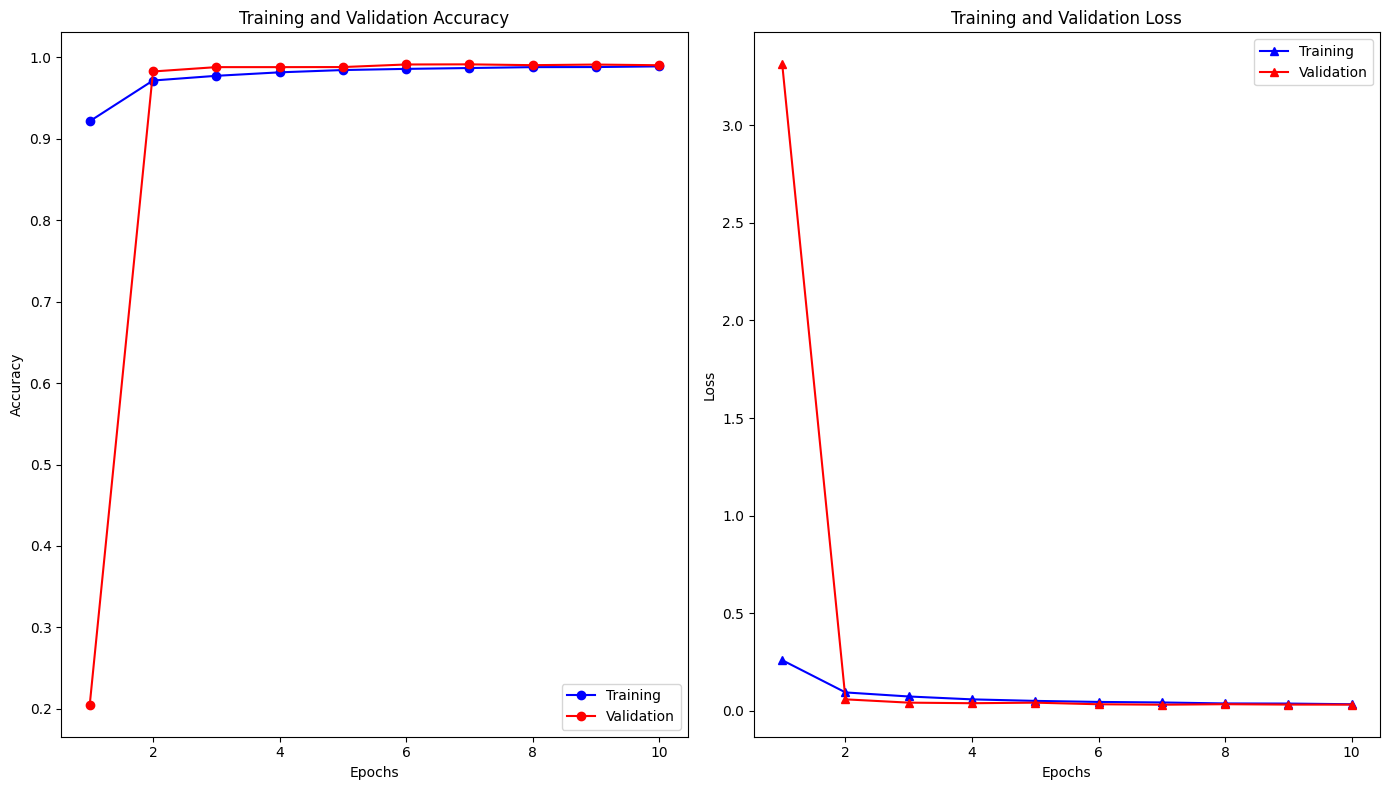


Test Accuracy: 99.10%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# 1. Load and prepare data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Build model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 3. Compile and train
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Store training history in 'history' variable
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2,
                   verbose=1)

# 4. Visualization
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(14, 8))

# Plot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'b^-', label='Training')
plt.plot(epochs, history.history['val_loss'], 'r^-', label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")